In [1]:
from sklearn import tree
from sklearn.tree import plot_tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Lesson 1

In [2]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


In [3]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

#### Data Preprocessing

In [4]:
X = data[['X_1', 'X_2']]
y = data.Y

#### Training

In [5]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

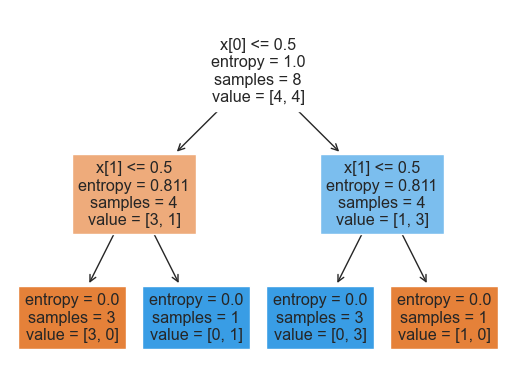

In [6]:
plot_tree(clf, filled=True);

### Lesson 2

In [7]:
import math as m

In [8]:
-1 * (4 / 9 * m.log(4 / 9, 2) + 5 / 9 * m.log(5 / 9, 2))

0.9910760598382222

In [9]:
-1 * (4 / 5 * m.log(4 / 5, 2) + 1 / 5 * m.log(1 / 5, 2))

0.7219280948873623

In [10]:
E_sh_sob = (1 / 1) * m.log2((1 / 1)) - 0
E_sh_kot = -(4 / 9) * m.log2((4 / 9)) - (5 / 9) * m.log2((5 / 9))
E_gav_sob = 0 - (5 / 5) * m.log2((5 / 5))
E_gav_kot = -(4 / 5) * m.log2((4 / 5)) - (1 / 5) * m.log2((1 / 5))
E_laz_sob = 0 - (6 / 6) * m.log2((6 / 6))
E_laz_kot = -(4 / 4) * m.log2((4 / 4)) - 0

In [11]:
E_sh_sob, E_sh_kot, E_gav_sob, E_gav_kot, E_laz_sob, E_laz_kot

(0.0, 0.9910760598382222, 0.0, 0.7219280948873623, 0.0, -0.0)

In [12]:
round(0.971 - (9 / 10 * E_sh_kot), 2), round(0.971 - 1 / 2 * E_gav_kot, 2), 0.97

(0.08, 0.61, 0.97)

### Lesson 3

In [13]:
titanic = pd.read_csv('https://stepik.org/media/attachments/course/4852/titanic.csv')

In [14]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Data Preprocessing

In [15]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
X = pd.get_dummies(X)
X.fillna({'Age': X.Age.median()}, inplace=True)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [17]:
y = titanic.Survived

#### Training

In [18]:
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

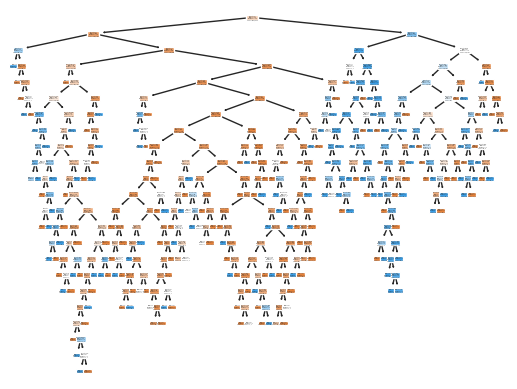

In [19]:
plot_tree(clf, filled=True);

#### Cross-Validation

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [23]:
clf.score(X_train, y_train), clf.score(X_test, y_test)

(0.9798657718120806, 0.7491525423728813)

In [24]:
new_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [25]:
new_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [26]:
new_clf.score(X_train, y_train), new_clf.score(X_test, y_test)

(0.8674496644295302, 0.7694915254237288)

### Lesson 4 Choose hyperparameters

In [27]:
max_depth_values = range(1, 100)

In [28]:
scores_data = pd.DataFrame()

In [29]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 'train_score': [train_score], 'test_score': [test_score]})
    scores_data = scores_data.append(temp_score_data)

C:\Users\sasha\AppData\Local\Temp\ipykernel_9200\2767675731.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\sasha\AppData\Local\Temp\ipykernel_9200\2767675731.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\sasha\AppData\Local\Temp\ipykernel_9200\2767675731.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\sasha\AppData\Local\Temp\ipykernel_9200\2767675731.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_da

In [30]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.806780


In [31]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score'],
                           var_name='set_type', value_name='score')
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


<Axes: xlabel='max_depth', ylabel='score'>

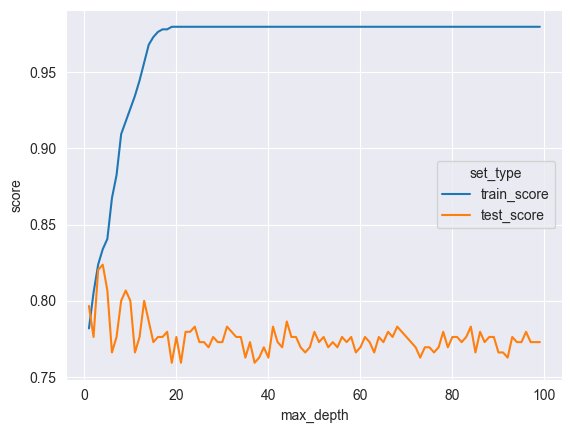

In [32]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [35]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.7886274509803922

##### Fix prev solution

In [36]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'scross_val_score': [mean_cross_val_score],
                                    })
    scores_data = scores_data.append(temp_score_data)

C:\Users\sasha\AppData\Local\Temp\ipykernel_9200\1748646189.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\sasha\AppData\Local\Temp\ipykernel_9200\1748646189.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\sasha\AppData\Local\Temp\ipykernel_9200\1748646189.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\sasha\AppData\Local\Temp\ipykernel_9200\1748646189.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_scor

In [37]:
scores_data_long = pd.melt(scores_data,
                           id_vars=['max_depth'],
                           value_vars=['train_score', 'test_score', 'scross_val_score'],
                           var_name='set_type',
                           value_name='score')
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


<Axes: xlabel='max_depth', ylabel='score'>

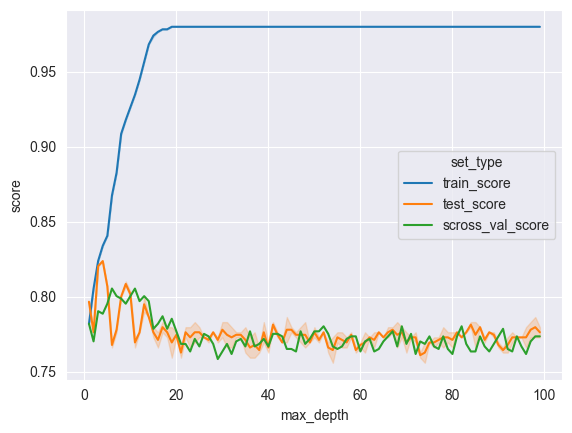

In [38]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [39]:
scores_data_long.query("set_type == 'scross_val_score'").head()

,max_depth,set_type,score
396,1,scross_val_score,NaN
397,2,scross_val_score,NaN
398,3,scross_val_score,NaN
399,4,scross_val_score,NaN
400,5,scross_val_score,NaN


In [40]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)
best_clf.fit(X_train, y_train)
cross_val_score(best_clf, X_train, y_train, cv=5).mean()

0.8003501400560223

### Lesson 5 Metrics

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score

In [42]:
clf = tree.DecisionTreeClassifier()
parameters = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30)}
grid_search_cv_clf = GridSearchCV(clf, parameters, cv=5)
grid_search_cv_clf

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [43]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [44]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [45]:
best_clf = grid_search_cv_clf.best_estimator_

In [46]:
best_clf.score(X_test, y_test)

0.7661016949152543

#### Metrics

In [47]:
y_pred = best_clf.predict(X_test)
precision_score(y_test, y_pred)

0.7931034482758621

In [48]:
recall_score(y_test, y_pred)

0.575

In [49]:
y_predicted_prob = best_clf.predict_proba(X_test)
y_predicted_prob

array([[0.88518519, 0.11481481],
       [0.88518519, 0.11481481],
       [0.88518519, 0.11481481],
       [0.        , 1.        ],
       [0.65625   , 0.34375   ],
       [1.        , 0.        ],
       [0.23809524, 0.76190476],
       [0.88518519, 0.11481481],
       [0.23809524, 0.76190476],
       [0.        , 1.        ],
       [0.125     , 0.875     ],
       [0.88518519, 0.11481481],
       [1.        , 0.        ],
       [0.88518519, 0.11481481],
       [0.88518519, 0.11481481],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.65625   , 0.34375   ],
       [0.88518519, 0.11481481],
       [1.        , 0.        ],
       [0.88518519, 0.11481481],
       [0.60714286, 0.39285714],
       [0.65625   , 0.34375   ],
       [0.88518519, 0.11481481],
       [0.88518519, 0.11481481],
       [0.6       , 0.4       ],
       [0.60714286, 0.39285714],
       [0.88518519, 0.11481481],
       [0.6       , 0.4       ],
       [0.65625   , 0.34375   ],
       [0.

<Axes: >

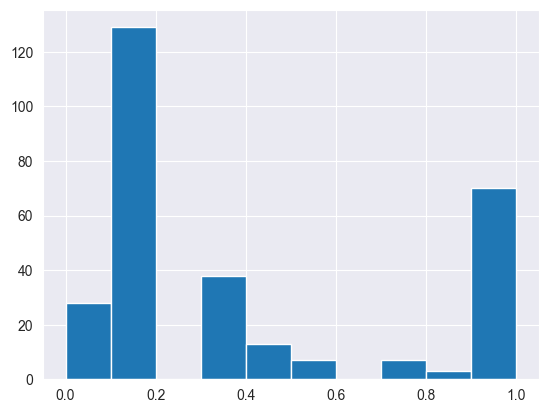

In [50]:
pd.Series(y_predicted_prob[:, 1]).hist()

In [51]:
import numpy as np

y_pred_max = np.where(y_predicted_prob[:, 1] > 0.8, 1, 0)
precision_score(y_test, y_pred_max), recall_score(y_test, y_pred_max)

(0.8493150684931506, 0.5166666666666667)

##### ROC curve

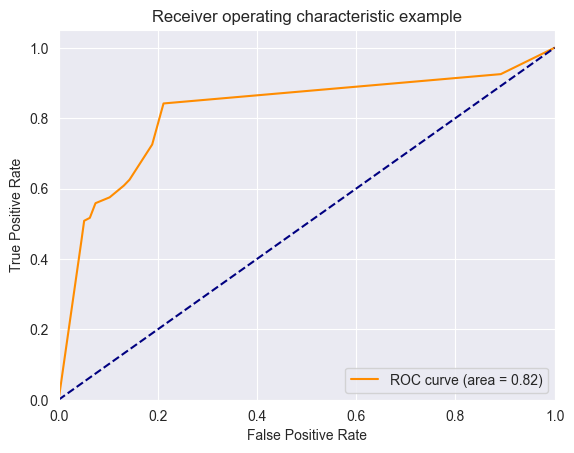

In [53]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Lesson 6 Practice

### Iris test

In [54]:
train_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv', index_col=0)
test_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv', index_col=0)
train_data.head()

,sepal length,sepal width,petal length,petal width,species
130,7.4,2.8,6.1,1.9,2
7,5.0,3.4,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
142,5.8,2.7,5.1,1.9,2
109,7.2,3.6,6.1,2.5,2


In [55]:
train_data.isnull().sum(), test_data.isnull().sum(),

(sepal length    0
 sepal width     0
 petal length    0
 petal width     0
 species         0
 dtype: int64,
 sepal length    0
 sepal width     0
 petal length    0
 petal width     0
 species         0
 dtype: int64)

In [56]:
X_train = train_data.drop(['species'], axis=1)
X_test = test_data.drop(['species'], axis=1)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [57]:
y_train = train_data.species
y_test = test_data.species

In [58]:
max_depth_values = range(1, 100)
scores_data = pd.DataFrame()
np.random.seed(0)
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    # mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    # 'scross_val_score': [mean_cross_val_score],
                                    })
    scores_data = scores_data.append(temp_score_data)

C:\Users\sasha\AppData\Local\Temp\ipykernel_9200\4273353456.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\sasha\AppData\Local\Temp\ipykernel_9200\4273353456.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\sasha\AppData\Local\Temp\ipykernel_9200\4273353456.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\sasha\AppData\Local\Temp\ipykernel_9200\4273353456.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_scor

In [59]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.70,0.60
0,2,0.97,0.94
0,3,0.99,0.94
0,4,1.00,0.92
0,5,1.00,0.92


In [60]:
scores_data_long = pd.melt(scores_data,
                           id_vars=['max_depth'],
                           value_vars=['train_score', 'test_score'],
                           var_name='set_type',
                           value_name='score')
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00


<Axes: xlabel='max_depth', ylabel='score'>

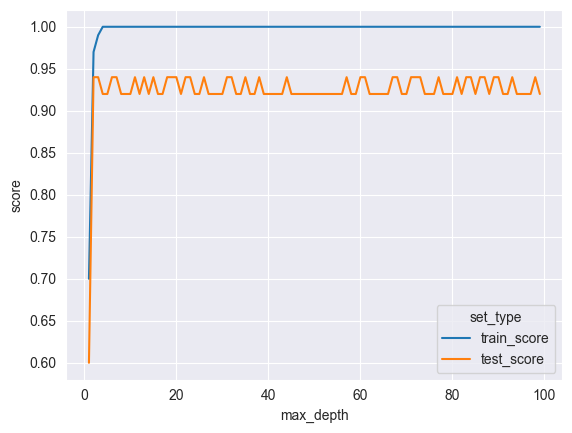

In [61]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

### Cats/Dogs Classifier

In [63]:
data = pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv')
data.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [64]:
X = data.drop(['Вид'], axis=1)
y = data.Вид
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

C:\Users\sasha\AppData\Local\Temp\ipykernel_9200\910888666.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\sasha\AppData\Local\Temp\ipykernel_9200\910888666.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\sasha\AppData\Local\Temp\ipykernel_9200\910888666.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\sasha\AppData\Local\Temp\ipykernel_9200\910888666.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_da

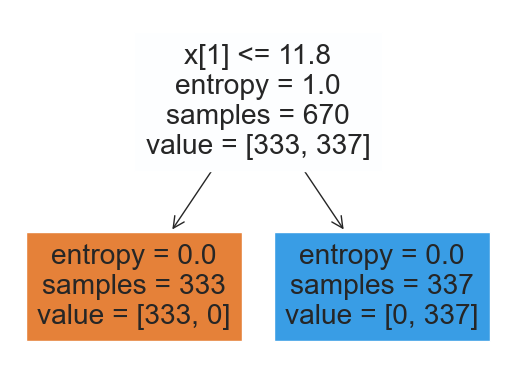

In [66]:
max_depth_values = range(1, 100)
scores_data = pd.DataFrame()
np.random.seed(0)
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    plot_tree(clf, filled=True)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    # mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    # 'scross_val_score': [mean_cross_val_score],
                                    })
    scores_data = scores_data.append(temp_score_data)

In [67]:
scores_data.head()

,max_depth,train_score,test_score
0,1,1.0,1.0
0,2,1.0,1.0
0,3,1.0,1.0
0,4,1.0,1.0
0,5,1.0,1.0


In [68]:
scores_data_long = pd.melt(scores_data,
                           id_vars=['max_depth'],
                           value_vars=['train_score', 'test_score'],
                           var_name='set_type',
                           value_name='score')
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,1.0
1,2,train_score,1.0
2,3,train_score,1.0
3,4,train_score,1.0
4,5,train_score,1.0


<AxesSubplot:xlabel='max_depth', ylabel='score'>

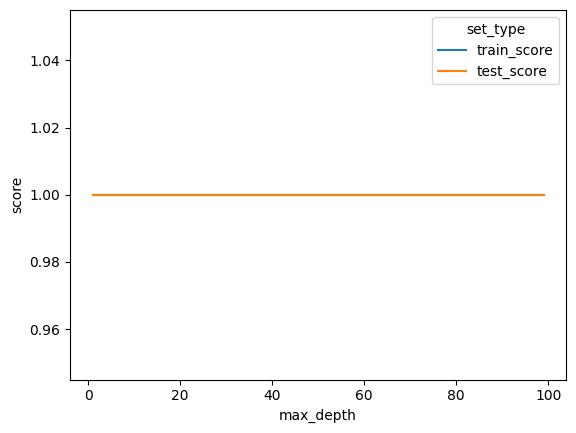

In [212]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [70]:
test_data = pd.read_json('datasets/dataset_209691_15.txt')
test_data.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,28,33.6,1,1,0
1,23,27.6,1,1,0
2,26,31.2,1,1,0
3,30,36.0,1,1,0
4,15,18.0,1,1,0


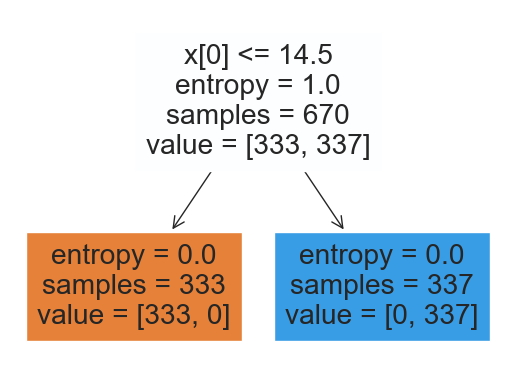

In [71]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)
clf.fit(X_train, y_train)
plot_tree(clf, filled=True);

In [72]:
result = clf.predict(test_data)
pd.Series(result)[result == 'собачка'].count()

50

### Lesson 7 Practice v2

In [73]:
data = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_data_tree.csv')
data.head()

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1


In [74]:
X = data.drop(['num'], axis=1)
y = data.num

In [76]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

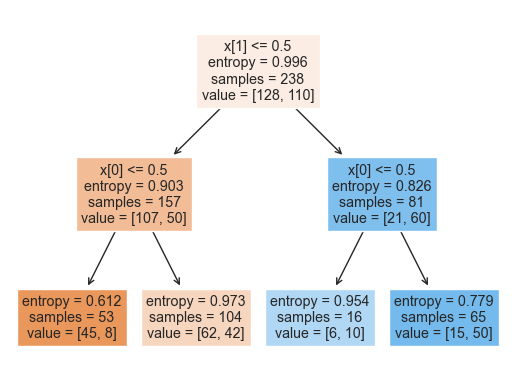

In [77]:
plot_tree(clf, filled=True);

In [78]:
# Task1
# IG = E(Y) - E(Y|X)
IG = 0.996 - (81 / 238 * 0.826) - (157 / 238 * 0.903)
IG

0.11920588235294127

In [79]:
# Task2
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train)
predicted = dt.predict(X_test)

confusion_matrix(y_test, predicted)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

In [80]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

clf = DecisionTreeClassifier(criterion='entropy')
parameters = {'max_depth': range(1, 11),
              'min_samples_split': range(2, 11),
              'min_samples_leaf': range(1, 11)}
search = GridSearchCV(clf, parameters, cv=5)  # RandomizedSearchCV
search.fit(X, y)

best_tree = search.best_estimator_

In [81]:
search.best_params_, best_tree.score(X_test, y_test)

({'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}, 1.0)